# Day 2 - Familiarise with scholarly data

## Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

## Load conference data

In [2]:
iswc = pd.read_csv('../data/raw/iswc_enhanced.csv', dtype=object)
iswc['author_order'] = pd.to_numeric(iswc['author_order'])

eswc = pd.read_csv('../data/raw/eswc_enhanced.csv', dtype=object)
eswc['author_order'] = pd.to_numeric(eswc['author_order'])

tpdl = pd.read_csv('../data/raw/tpdl_enhanced.csv', dtype=object)
tpdl['author_order'] = pd.to_numeric(tpdl['author_order'])


In [3]:
iswc.loc[iswc.book_doi == '10.1007/978-3-319-25010-6', 'conf_city'] = 'Bethlehem'
iswc.loc[iswc.book_doi == '10.1007/978-3-319-25010-6', 'conf_country'] = 'United States'

iswc.loc[iswc.book_doi == '10.1007/978-3-319-25007-6', 'conf_city'] = 'Bethlehem'
iswc.loc[iswc.book_doi == '10.1007/978-3-319-25007-6', 'conf_country'] = 'United States'

iswc.loc[iswc.book_doi == '10.1007/978-3-540-76298-0', 'conf_city'] = 'Busan'
iswc.loc[iswc.book_doi == '10.1007/978-3-540-76298-0', 'conf_country'] = 'South Korea'

iswc.loc[iswc.conf_country == 'USA', 'conf_country'] = 'United States'

In [4]:
iswc['conf_acronym'].unique()

array(['ISWC', 'SWSWPC', 'SWDB'], dtype=object)

In [5]:
iswc[iswc.conf_acronym == 'SWSWPC'].head()

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
154,10.1007/978-3-540-30581-1_4,semweb,SWSWPC,International Workshop on Semantic Web Service...,"San Diego, CA",United States,2,Massimo,Paolucci,grid.147455.6,...,Pittsburgh,United States,US,Carnegie Mellon University,Bringing Semantics to Web Services: The OWL-S ...,10.1007/b105145,Semantic Web Services and Web Process Composition,"First International Workshop, SWSWPC 2004, San...",Restricted,2005-01-01
155,10.1007/978-3-540-30581-1_4,semweb,SWSWPC,International Workshop on Semantic Web Service...,"San Diego, CA",United States,4,Mark,Burstein,grid.147455.6,...,Pittsburgh,United States,US,Carnegie Mellon University,Bringing Semantics to Web Services: The OWL-S ...,10.1007/b105145,Semantic Web Services and Web Process Composition,"First International Workshop, SWSWPC 2004, San...",Restricted,2005-01-01
156,10.1007/978-3-540-30581-1_4,semweb,SWSWPC,International Workshop on Semantic Web Service...,"San Diego, CA",United States,5,Drew,McDermott,grid.147455.6,...,Pittsburgh,United States,US,Carnegie Mellon University,Bringing Semantics to Web Services: The OWL-S ...,10.1007/b105145,Semantic Web Services and Web Process Composition,"First International Workshop, SWSWPC 2004, San...",Restricted,2005-01-01
157,10.1007/978-3-540-30581-1_4,semweb,SWSWPC,International Workshop on Semantic Web Service...,"San Diego, CA",United States,6,Deborah,McGuinness,grid.147455.6,...,Pittsburgh,United States,US,Carnegie Mellon University,Bringing Semantics to Web Services: The OWL-S ...,10.1007/b105145,Semantic Web Services and Web Process Composition,"First International Workshop, SWSWPC 2004, San...",Restricted,2005-01-01
158,10.1007/978-3-540-30581-1_4,semweb,SWSWPC,International Workshop on Semantic Web Service...,"San Diego, CA",United States,7,Bijan,Parsia,grid.147455.6,...,Pittsburgh,United States,US,Carnegie Mellon University,Bringing Semantics to Web Services: The OWL-S ...,10.1007/b105145,Semantic Web Services and Web Process Composition,"First International Workshop, SWSWPC 2004, San...",Restricted,2005-01-01


In [6]:
iswc[iswc.conf_acronym == 'SWDB'].head()

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
243,10.1007/978-3-540-31839-2_15,semweb,SWDB,International Workshop on Semantic Web and Dat...,"Toronto, ON",Canada,1,Kenneth A.,Ross,grid.21729.3f,...,New York,United States,US,Columbia University,Querying Faceted Databases,10.1007/b106149,Semantic Web and Databases,"Second International Workshop, SWDB 2004, Toro...",Restricted,2005-01-01
244,10.1007/978-3-540-31839-2_15,semweb,SWDB,International Workshop on Semantic Web and Dat...,"Toronto, ON",Canada,2,Angel,Janevski,grid.21729.3f,...,New York,United States,US,Columbia University,Querying Faceted Databases,10.1007/b106149,Semantic Web and Databases,"Second International Workshop, SWDB 2004, Toro...",Restricted,2005-01-01
608,10.1007/978-3-540-31839-2_13,semweb,SWDB,International Workshop on Semantic Web and Dat...,"Toronto, ON",Canada,1,Andrea,Calì,grid.34988.3e,...,Bolzano,Italy,IT,Free University of Bolzano/Bozen,Query Answering by Rewriting in GLAV Data Inte...,10.1007/b106149,Semantic Web and Databases,"Second International Workshop, SWDB 2004, Toro...",Restricted,2005-01-01
783,10.1007/978-3-540-31839-2_14,semweb,SWDB,International Workshop on Semantic Web and Dat...,"Toronto, ON",Canada,1,Bhuvan,Bamba,grid.435338.a,...,Bengaluru,India,IN,IBM,Utilizing Resource Importance for Ranking Sema...,10.1007/b106149,Semantic Web and Databases,"Second International Workshop, SWDB 2004, Toro...",Restricted,2005-01-01
784,10.1007/978-3-540-31839-2_14,semweb,SWDB,International Workshop on Semantic Web and Dat...,"Toronto, ON",Canada,2,Sougata,Mukherjea,grid.435338.a,...,Bengaluru,India,IN,IBM,Utilizing Resource Importance for Ranking Sema...,10.1007/b106149,Semantic Web and Databases,"Second International Workshop, SWDB 2004, Toro...",Restricted,2005-01-01


In [7]:
iswc = iswc.drop(iswc[iswc.conf_acronym != 'ISWC'].index)
iswc_first = iswc[iswc.author_order == 1]
iswc_last_authors_idx = iswc.groupby('paper_doi')['author_order'].transform(max) == iswc['author_order']
iswc_last = iswc[iswc_last_authors_idx]
iswc_middle = iswc[iswc_last_authors_idx.map(lambda x: not x)]
iswc_middle = iswc_middle[iswc_middle.author_order != 1]

In [8]:
iswc.describe(include='all')

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
count,3924,3924,3924,3924,3924,3924,3924.000000,3924,3924,3739,...,3623,3749,3749,3907,3924,3924,3924,3924,3924,3924
unique,1028,1,1,1,14,8,NaN,1470,1916,441,...,264,44,46,896,1028,21,14,21,2,14
top,10.1007/978-3-319-25010-6_12,semweb,ISWC,International Semantic Web Conference,Kobe,United States,NaN,Michael,Wang,grid.5379.8,...,Amsterdam,United States,US,University of Manchester,Building and Using a Knowledge Graph to Combat...,10.1007/11926078,The Semantic Web ? ISWC 2016,"5th International Semantic Web Conference, ISW...",OpenAccess,2016-01-01
freq,23,3924,3924,3924,340,1406,NaN,42,47,145,...,175,717,717,85,23,309,340,309,2115,340
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.358169,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
eswc['conf_acronym'].unique()

array(['ESWC', 'ESWS'], dtype=object)

In [10]:
eswc[eswc.conf_acronym == 'ESWS'].head(1)['conf_name']

171    European Semantic Web Symposium
Name: conf_name, dtype: object

In [11]:
eswc_first = eswc[eswc.author_order == 1]
eswc_last_authors_idx = eswc.groupby('paper_doi')['author_order'].transform(max) == eswc['author_order']
eswc_last = eswc[eswc_last_authors_idx]
eswc_middle = eswc[eswc_last_authors_idx.map(lambda x: not x)]
eswc_middle = eswc_middle[eswc_middle.author_order != 1]

In [12]:
eswc[eswc.conf_name == 'International Semantic Web Conference'].head()

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
9,10.1007/978-3-319-25639-9_10,esws,ESWC,International Semantic Web Conference,Portoro?,Slovenia,1,Giorgos,Giannopoulos,grid.19843.37,...,Marousi,Greece,GR,ATHENA Research Center,FAGI-gis: A Tool for Fusing Geospatial RDF Data,10.1007/978-3-319-25639-9,The Semantic Web: ESWC 2015 Satellite Events,"ESWC 2015 Satellite Events, Portoro?, Slovenia...",Restricted,2015-01-01
10,10.1007/978-3-319-25639-9_10,esws,ESWC,International Semantic Web Conference,Portoro?,Slovenia,2,Nick,Vitsas,grid.19843.37,...,Marousi,Greece,GR,ATHENA Research Center,FAGI-gis: A Tool for Fusing Geospatial RDF Data,10.1007/978-3-319-25639-9,The Semantic Web: ESWC 2015 Satellite Events,"ESWC 2015 Satellite Events, Portoro?, Slovenia...",Restricted,2015-01-01
11,10.1007/978-3-319-25639-9_10,esws,ESWC,International Semantic Web Conference,Portoro?,Slovenia,3,Nikos,Karagiannakis,grid.19843.37,...,Marousi,Greece,GR,ATHENA Research Center,FAGI-gis: A Tool for Fusing Geospatial RDF Data,10.1007/978-3-319-25639-9,The Semantic Web: ESWC 2015 Satellite Events,"ESWC 2015 Satellite Events, Portoro?, Slovenia...",Restricted,2015-01-01
12,10.1007/978-3-319-25639-9_10,esws,ESWC,International Semantic Web Conference,Portoro?,Slovenia,4,Dimitrios,Skoutas,grid.19843.37,...,Marousi,Greece,GR,ATHENA Research Center,FAGI-gis: A Tool for Fusing Geospatial RDF Data,10.1007/978-3-319-25639-9,The Semantic Web: ESWC 2015 Satellite Events,"ESWC 2015 Satellite Events, Portoro?, Slovenia...",Restricted,2015-01-01
13,10.1007/978-3-319-25639-9_10,esws,ESWC,International Semantic Web Conference,Portoro?,Slovenia,5,Spiros,Athanasiou,grid.19843.37,...,Marousi,Greece,GR,ATHENA Research Center,FAGI-gis: A Tool for Fusing Geospatial RDF Data,10.1007/978-3-319-25639-9,The Semantic Web: ESWC 2015 Satellite Events,"ESWC 2015 Satellite Events, Portoro?, Slovenia...",Restricted,2015-01-01


In [13]:
eswc.describe(include='all')

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
count,4224,4224,4224,4224,4224,4224,4224.000000,4224,4224,4076,...,3858,4083,4085,4224,4224,4224,4224,4224,3485,4224
unique,1141,1,2,4,8,5,NaN,1561,2176,511,...,293,54,54,961,1140,22,10,22,2,13
top,10.1007/978-3-642-41242-4_48,esws,ESWC,European Semantic Web Conference,"Heraklion, Crete",Greece,NaN,Thomas,Motta,grid.6142.1,...,Karlsruhe,Germany,DE,The Open University,Optique: OBDA Solution for Big Data,10.1007/978-3-319-11955-7,The Semantic Web: Research and Applications,"ESWC 2014 Satellite Events, Anissaras, Crete, ...",OpenAccess,2015-01-01
freq,23,4224,4103,1899,1656,2646,NaN,45,21,133,...,150,939,939,123,23,334,1814,334,1787,630
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.826231,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.228295,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
tpdl['conf_acronym'].unique()

array(['TPDL', 'ECDL'], dtype=object)

In [15]:
tpdl.loc[tpdl.year == '2014-01-01', 'year'] = '2013-01-01'

In [16]:
tpdl_first = tpdl[tpdl.author_order == 1]
tpdl_last_authors_idx = tpdl.groupby('paper_doi')['author_order'].transform(max) == tpdl['author_order']
tpdl_last = tpdl[tpdl_last_authors_idx]
tpdl_middle = tpdl[tpdl_last_authors_idx.map(lambda x: not x)]
tpdl_middle = tpdl_middle[tpdl_middle.author_order != 1]

In [17]:
tpdl.describe(include='all')

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
count,3271,3271,3271,3271,3271,3271,3271.000000,3271,3271,3208,...,2991,3216,3216,3261,3271,3271,3271,3271,3168,3271
unique,919,1,2,1,14,11,NaN,1382,1736,485,...,280,52,52,867,893,16,3,15,2,14
top,10.1007/978-3-319-14226-5_4,ercimdl,ECDL,International Conference on Theory and Practic...,Valletta,Malta,NaN,Michael,Fox,grid.438526.e,...,Athens,United States,US,Virginia Tech,Understanding Climate Data Through Commentary ...,10.1007/978-3-642-15464-5,Research and Advanced Technology for Digital L...,"14th European Conference, ECDL 2010, Glasgow, ...",Restricted,2013-01-01
freq,23,3271,1981,3271,466,466,NaN,36,26,93,...,92,607,607,77,46,309,2835,309,3134,466
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.747784,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.922260,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis

For the sake of simplicity, we can create a variable and assign one of our dataframes `iswc`, `eswc`, `tpdl`.

Pick one for the moment. Later, you can come up here, switch to another dataframe and run again the cells below.

In [18]:
df = iswc

In [19]:
df_first = df[df.author_order == 1]
df_last_authors_idx = df.groupby('paper_doi')['author_order'].transform(max) == df['author_order']
df_last = df[df_last_authors_idx]
df_middle = df[df_last_authors_idx.map(lambda x: not x)]
df_middle = df_middle[df_middle.author_order != 1]

In [20]:
df[df.paper_doi == '10.1007/11926078_12']

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
0,10.1007/11926078_12,semweb,ISWC,International Semantic Web Conference,"Athens, GA",United States,4,Ryan,Lee,NaN,...,NaN,NaN,NaN,(World Wide Web Consortium),Fresnel: A Browser-Independent Presentation Vo...,10.1007/11926078,The Semantic Web - ISWC 2006,"5th International Semantic Web Conference, ISW...",OpenAccess,2006-01-01
637,10.1007/11926078_12,semweb,ISWC,International Semantic Web Conference,"Athens, GA",United States,2,Christian,Bizer,grid.14095.39,...,Berlin,Germany,DE,Freie Universität Berlin,Fresnel: A Browser-Independent Presentation Vo...,10.1007/11926078,The Semantic Web - ISWC 2006,"5th International Semantic Web Conference, ISW...",OpenAccess,2006-01-01
980,10.1007/11926078_12,semweb,ISWC,International Semantic Web Conference,"Athens, GA",United States,1,Emmanuel,Pietriga,grid.464180.f,...,Gif-sur-Yvette,France,FR,INRIA & Laboratoire de Recherche en Informatiq...,Fresnel: A Browser-Independent Presentation Vo...,10.1007/11926078,The Semantic Web - ISWC 2006,"5th International Semantic Web Conference, ISW...",OpenAccess,2006-01-01
1414,10.1007/11926078_12,semweb,ISWC,International Semantic Web Conference,"Athens, GA",United States,3,David,Karger,grid.116068.8,...,Cambridge,United States,US,MIT CSAIL,Fresnel: A Browser-Independent Presentation Vo...,10.1007/11926078,The Semantic Web - ISWC 2006,"5th International Semantic Web Conference, ISW...",OpenAccess,2006-01-01
1415,10.1007/11926078_12,semweb,ISWC,International Semantic Web Conference,"Athens, GA",United States,4,Ryan,Lee,grid.116068.8,...,Cambridge,United States,US,MIT CSAIL,Fresnel: A Browser-Independent Presentation Vo...,10.1007/11926078,The Semantic Web - ISWC 2006,"5th International Semantic Web Conference, ISW...",OpenAccess,2006-01-01


In [21]:
df.book_confSubtitle.unique()

array(['5th International Semantic Web Conference, ISWC 2006, Athens, GA, USA, November 5-9, 2006, Proceedings',
       'Second International Semantic Web Conference, Sanibel Island, FL, USA, October 20-23, 2003, Proceedings',
       '11th International Semantic Web Conference, Boston, MA, USA, November 11-15, 2012, Proceedings, Part I',
       '14th International Semantic Web Conference, Bethlehem, PA, USA, October 11-15, 2015, Proceedings, Part I',
       '15th International Semantic Web Conference, Kobe, Japan, October 17?21, 2016, Proceedings, Part I',
       '11th International Semantic Web Conference, Boston, MA, USA, November 11-15, 2012, Proceedings, Part II',
       '10th International Semantic Web Conference, Bonn, Germany, October 23-27, 2011, Proceedings, Part II',
       '7th International Semantic Web Conference, ISWC 2008, Karlsruhe, Germany, October 26-30, 2008, Proceedings',
       '9th International Semantic Web Conference, ISWC 2010, Shanghai, China, November 7-11, 2

**Task:** which countries the conference visited?

In [22]:
df.conf_country.unique()

array(['United States', 'Japan', 'Germany', 'China', 'Ireland',
       'South Korea', 'Italy', 'Australia'], dtype=object)

**Task:** any country multiple times? Can you do a bar plot?

<AxesSubplot:xlabel='conf_country'>

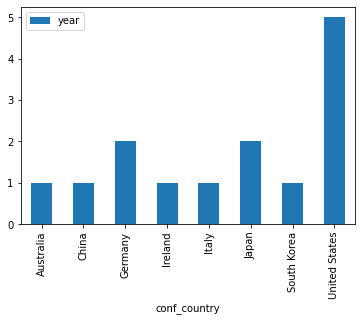

In [23]:
df[['conf_country', 'year']].drop_duplicates().groupby('conf_country').count().plot.bar()

**Task:** which cities?

In [24]:
df.conf_city.unique()

array(['Athens, GA', 'Sanibel, FL', 'Boston, MA', 'Bethlehem', 'Kobe',
       'Bonn', 'Karlsruhe', 'Shanghai', 'Galway', 'Hiroshima', 'Busan',
       'Riva del Garda', 'Chantilly, VA', 'Sydney, NSW'], dtype=object)

**Task:** Find the top-10 researcher by number of papers published

In [25]:
df[['author_familyName', 'author_givenName', 'paper_doi']]\
        .groupby(['author_familyName', 'author_givenName'])\
        .count()\
        .sort_values(by=['paper_doi'], ascending=False).reset_index()\
        .head(10)

,author_familyName,author_givenName,paper_doi
0,Horrocks,Ian,27
1,Parsia,Bijan,26
2,Lehmann,Jens,17
3,Auer,Sören,17
4,Decker,Stefan,17
5,Musen,Mark A.,16
6,Staab,Steffen,15
7,Noy,Natalya F.,15
8,Sattler,Ulrike,14
9,Alani,Harith,14


**Task:** Find the top-10 researcher by number of papers published (in last position)

**Task:** Find the top-10 researcher by number of papers published (in first position)

**Task:** are there notable inversions?

**Task:** Find and plot the total number of contributions per year

<AxesSubplot:xlabel='year'>

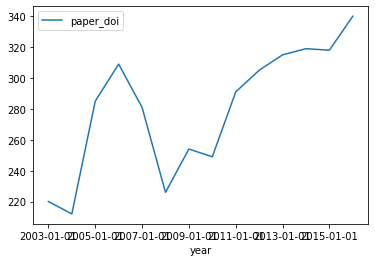

In [26]:
df.groupby(['year'])['paper_doi'].count().reset_index().plot.line(x='year', y='paper_doi')
# Same as the following
# df.groupby(['year'])['paper_doi'].count().plot.line(y='paper_doi')
# df.groupby(['year'])['paper_doi'].count().plot.line()

**Task:** Find and plot the same just with grid.id attached (i.e., with an orgnanisation explicitly attached)

<AxesSubplot:xlabel='year'>

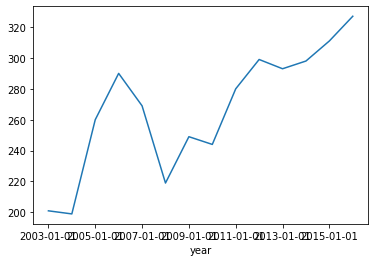

In [27]:
df[df['org_gridId'].notna()].groupby(['year'])['paper_doi'].count().plot.line(y='paper_doi')

**Task:** Find and plot the same just without grid.id attached

<AxesSubplot:xlabel='year'>

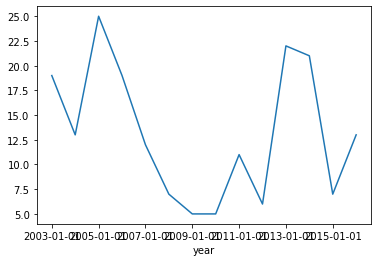

In [28]:
df[df['org_gridId'].isna()].groupby(['year'])['paper_doi'].count().plot.line()

For clarity, these can go in the same plot.

<AxesSubplot:xlabel='year'>

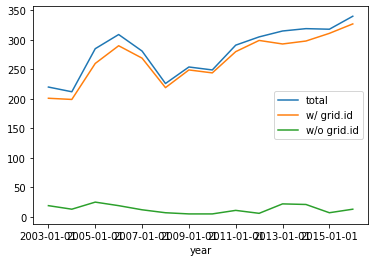

In [29]:
fig, ax = plt.subplots()

df.groupby(['year'])['paper_doi'].count().reset_index().plot.line(x='year', y='paper_doi', ax=ax, label='total')
df[df['org_gridId'].notna()].groupby(['year'])['paper_doi'].count().reset_index().plot.line(x='year', y='paper_doi', ax=ax, label='w/ grid.id')
df[df['org_gridId'].isna()].groupby(['year'])['paper_doi'].count().reset_index().plot.line(x='year', y='paper_doi', ax=ax, label='w/o grid.id')

In [30]:
contributions = df.groupby(['year'])['paper_doi'].count()
contributions_with_gridId = df[df['org_gridId'].notna()].groupby(['year'])['paper_doi'].count()
contributions_without_gridId = df[df['org_gridId'].isna()].groupby(['year'])['paper_doi'].count()

trace1 = go.Scatter(x=contributions.index,
                    y=contributions.values,
                    name='contributions',
                    marker=dict(symbol='circle', size=8),
                    mode='lines+markers')
                    
trace2 = go.Scatter(x=contributions_with_gridId.index,
                    y=contributions_with_gridId.values,
                    name='contributions (w/ gridID)',
                    marker=dict(symbol='cross', size=8),
                    mode='lines+markers')

trace3 = go.Scatter(x=contributions_without_gridId.index,
                    y=contributions_without_gridId.values,
                    name='contributions (w/o gridID)',
                    marker=dict(symbol='triangle-up', size=8),
                    mode='lines+markers')
                    
layout = go.Layout(title='Trends of contributions',
                   legend=dict(orientation='h'))

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
plotly.offline.iplot(fig)

**Task:** Find and plot the trend of PIDs (i.e., DOIs and grid.ids) per year

**Task:** Find and plot the distribution of papers by country per year

In [31]:
TOP_N = 30
dois = df.groupby(['org_countrycode'])['paper_doi'].nunique().reset_index()
data = [
    go.Bar(
        x=dois.sort_values(by=['paper_doi'], ascending=False)['org_countrycode'],
        y=dois.sort_values(by=['paper_doi'], ascending=False)['paper_doi']
    )
]
layout = go.Layout(
    title='Paper distribution by country',
    xaxis=dict(tickangle=45,tickfont=dict(size=12), range=[-.5, TOP_N - 1 + .5])
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [32]:
dois = df.groupby(['org_countrycode'])['paper_doi'].nunique().reset_index()
dois_first = df_first.groupby(['org_countrycode'])['paper_doi'].nunique().reset_index()
dois_last = df_last.groupby(['org_countrycode'])['paper_doi'].nunique().reset_index()

bar_1 = go.Bar(y=dois['paper_doi'],
              x=dois['org_countrycode'],
              name='Overall')

bar_2 = go.Bar(y=dois_first['paper_doi'],
              x=dois_first['org_countrycode'],
              name='First')

bar_3 = go.Bar(y=dois_last['paper_doi'],
              x=dois_last['org_countrycode'],
              name='Last')

layout = go.Layout(title='DOI breakdown by country',
                   legend=dict(orientation='h'))

fig = go.Figure(data=[bar_1,bar_2,bar_3], layout=layout)
plotly.offline.iplot(fig)

We can also plot as a pie chart

In [33]:
dois = df.groupby(['org_countrycode'])['paper_doi'].nunique().reset_index()
dois_first = df_first.groupby(['org_countrycode'])['paper_doi'].nunique().reset_index()
dois_last = df_last.groupby(['org_countrycode'])['paper_doi'].nunique().reset_index()

pie_1 = go.Pie(values=dois['paper_doi'],
              labels=dois['org_countrycode'],
              textposition='inside',
              domain=dict(x=[0, 1], y=[.4, 1]),
              name='DOIs',
              hoverinfo='label+value+name',
              hole=.4)

pie_2 = go.Pie(values=dois_first['paper_doi'],
              labels=dois_first['org_countrycode'],
              textposition='inside',
              domain=dict(x=[0, .5], y=[0, .6]),
              name='DOIs',
              hoverinfo='label+value+name',
              hole=.4)

pie_3 = go.Pie(values=dois_last['paper_doi'],
              labels=dois_last['org_countrycode'],
              textposition='inside',
              domain=dict(x=[.5, 1], y=[0, .6]),
              name='DOIs',
              hoverinfo='label+value+name',
              hole=.4)

tris_donut = go.Layout(title='DOI breakdown by country',
                       annotations=[dict(font=dict(size=15),
                                        showarrow=False,
                                        text='All authors',
                                        x=.5, y=1.07),
                                    dict(font=dict(size=15),
                                        showarrow=False,
                                        text='1st authors',
                                        x=.18, y=-0.07),
                                    dict(font=dict(size=15),
                                        showarrow=False,
                                        text='Last authors',
                                        x=.83, y=-0.07)])

fig = go.Figure(data=[pie_1,pie_2,pie_3], layout=tris_donut)
plotly.offline.iplot(fig)

**Task:** Can you do the same plots aggregating by organisations?